In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict
import seaborn as sns; sns.set()

In [3]:
environments = ["CartPole-v0", "MountainCar-v0", "LunarLander-v2"] #, "Taxi-v2"
model_types = ["Reinforce", "Advantage", "Q"]

result_dict_all = {e:{} for e in environments}
for environment in environments:
    result_dict_all[environment] = {m:{} for m in model_types}
    for model_type in model_types:
        if model_type == "Reinforce":
            n_steps = ["Monte Carlo"]
        else:
            n_steps = ["1", "2", "4", "8"]
        for n_step in n_steps:
#             print("-----------------------------")
#             print(environment, model_type, n_step)

            # PLOT
            filename = "Results_Claartje/numpy/{}_n_step{}_{}.pickle".format(environment, n_step, model_type)

            with open(filename, 'rb') as handle:
                result_dict = pickle.load(handle)
                result_dict_all[environment][model_type][n_step] = result_dict

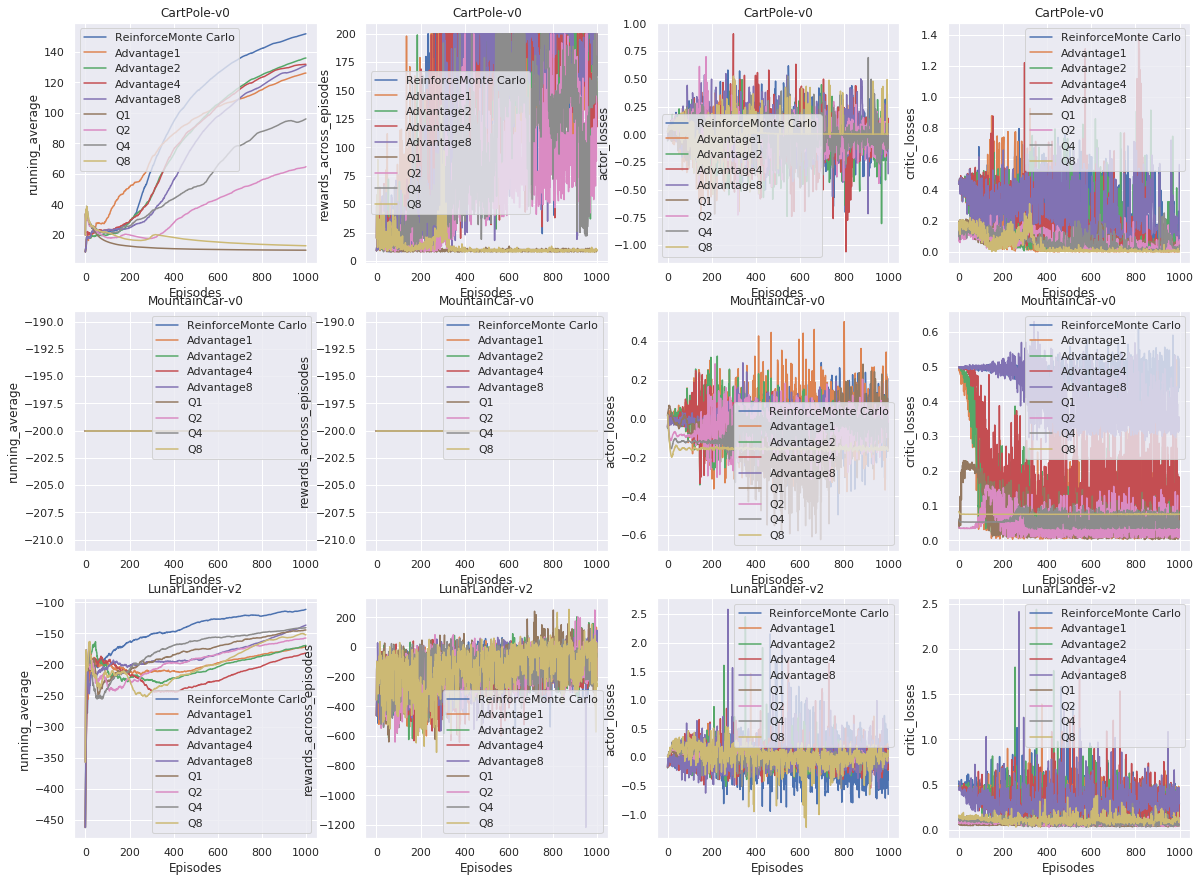

In [4]:
metrics = ['running_average', 'rewards_across_episodes', 'actor_losses', 'critic_losses']
fig, axs = plt.subplots(3, 4, figsize=(20, 15)) # 3 environments, 4 metrics
for row, environment in enumerate(environments):
    for model_type in model_types:
        if model_type == "Reinforce":
            n_steps = ["Monte Carlo"]
        else:
            n_steps = ["1", "2", "4", "8"]
        for n_step in n_steps:
            result_dict = result_dict_all[environment][model_type][n_step]
            for col, metric in enumerate(metrics):
                axs[row, col].set_title(environment)
                axs[row, col].set_ylabel(metric)
                axs[row, col].set_xlabel('Episodes')
                axs[row, col].plot(result_dict[metric], label=model_type + str(n_step))
                axs[row, col].legend()
plt.show()

# Variance Plot


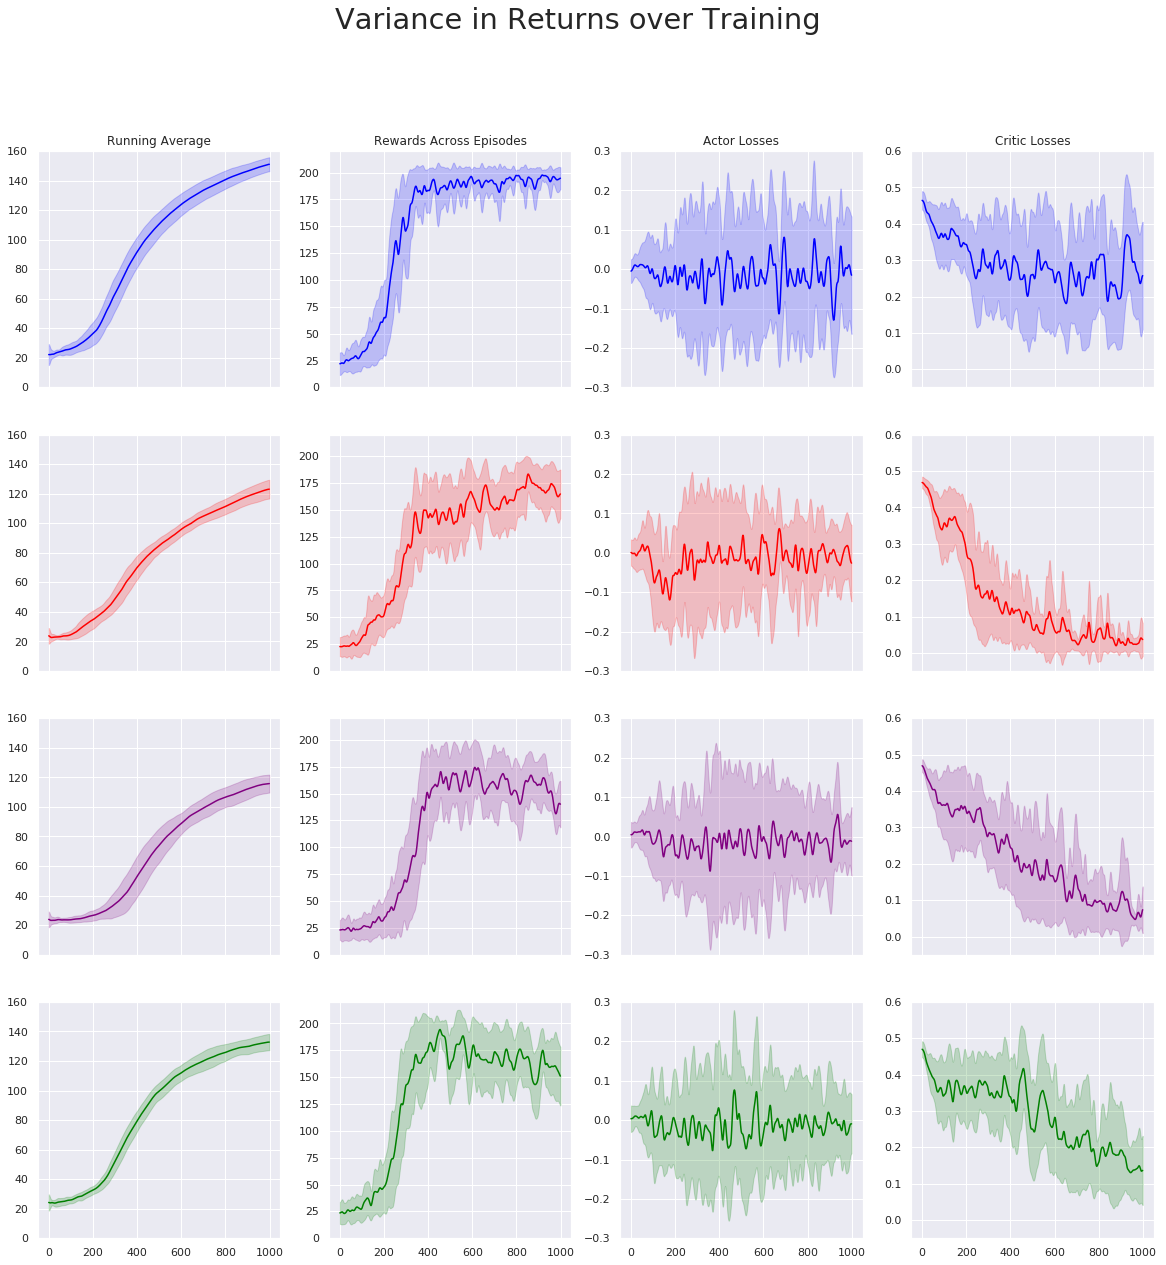

In [6]:
from scipy.ndimage.filters import gaussian_filter1d

def crawl_results(env, n_step, model_type, seeds, metric, res_dir):
    # get results 
    res = []
    for seed in seeds:
        file = "{}{}_n_step{}_{}_{}.pickle".format(res_dir, env, n_step, model_type, seed)
        with open(file, 'rb') as handle:
            result_dict = pickle.load(handle)
            res.append(result_dict[metric])
    return res 

def plot_variance(env, row_settings,res_dir):
    # Fixed so far
    metrics = ['running_average', 'rewards_across_episodes', 'actor_losses', 'critic_losses']
    metrics_strings = ['Running Average', 'Rewards Across Episodes', 'Actor Losses', 'Critic Losses']
    seeds = range(43,48)
    res_dir = res_dir+"res_numpy_"
    
    fig, axs = plt.subplots(len(row_settings), len(metrics), figsize=(20,20), sharex=True)
    fig.suptitle("Variance in Returns over Training")
    
    for row, r in enumerate(row_settings):
        # read settings
        [n_step, model_type, c] = r
            
        for col, metric in enumerate(metrics):

            res = crawl_results(env, n_step, model_type, seeds, metric, res_dir)
            res = np.asarray(res)

            x = np.arange(res.shape[1])
            std = np.std(res, axis=0)
            mean = np.mean(res, axis=0)

            std = gaussian_filter1d(std, 5)
            mean = gaussian_filter1d(mean,5)
            
            if not row:
                axs[row, col].title.set_text(metrics_strings[col])
            if col==0:
                axs[row, col].set_ylim([-0.05,  160])
            if col==1:
                axs[row, col].set_ylim([-0.05,  220]) 
            if col==2:
                axs[row, col].set_ylim([-0.3,  0.3])
            if col==3:
                axs[row, col].set_ylim([-0.05,  0.6])
            axs[row, col].plot(x, mean, color=c)
            axs[row, col].fill_between(x, mean + std, mean - std, alpha=0.2, color=c)
            
    #plt.show()
    plt.savefig("variance_plot.png")
    
    
env = "CartPole-v0"
plt.rcParams.update({'font.size': 24})


row_settings =  [["MonteCarlo", "Reinforce","blue"],
                 [2, "Advantage", "red"],
                 [4, "Advantage", "purple"],
                 [8, "Advantage", "green"]]

plot_variance(env, row_settings, './Results_Variance/Cartpole/Res/')
